# **Philippine Scam SMS**
**Phase 2: Natural Language Processing**

**Author/s: [Anton Reyes](https://www.github.com/AGR-yes)**

## **Introduction**

### **Requirements and Imports**

#### **Imports**

**Basic Libraries**

* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis

In [33]:
import numpy as np
import pandas as pd

**Visualization Libraries**

* `matplotlib.pyplot` contains functions to create interactive plots
* `seaborn` is a library based on matplotlib that allows for data visualization
* `plotly` is an open-source graphing library for Python.

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

**Natural Language Processing Libraries**
* `re` is a module that allows the use of regular expressions
* `spaCy` is an NLP library for "understand" lrge volumes of text
* `WordCloud` is a tool to show the most frequently used word in the dataset
* `NLTK` is an open-source library for NLP and linguistics

In [35]:
import re
import spacy
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


#### **Datasets and Files**

The following files were used for this project:

- `proof.csv` contains features `proof` and `name` only after Phase 1. This does not contain the type of spam and lacks classification.
- `genediazjr-tagalog.txt` used to add _Tagalog_ Stopwords for NLP


## **Data Collection**

Importing the dataset using pandas.

In [36]:
dataset = "Processed Datasets\proof.csv"

proof = pd.read_csv(dataset)
proof.tail()

,proof,name,type
5037,"Araw-araw na suweld0 5000, kai1angan lang ng 1...",False,NaN
5038,Goodnews! VIP perks at SUGARPLAY Sign up & Cla...,False,NaN
5039,Start referring & earning at SUGARPLAY Earn e...,True,NaN
5040,", Experience the thrill at JackpotCity! Enjoy ...",True,NaN
5041,", Get 5% Deposit bonus using PAYMAYA at UNIBET...",True,NaN


## **Description of the Dataset**

Here, we find the shape of the dataset.

In [37]:
proof.shape

(5042, 3)

By looking at the `info` of the dataframe, we can see that there are `non-null` values. 

In [38]:
proof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   proof   1414 non-null   object
 1   name    5042 non-null   bool  
 2   type    4679 non-null   object
dtypes: bool(1), object(2)
memory usage: 83.8+ KB


## **Exploratory Data Analysis (Raw Text)**

### **Wordcloud**


In [39]:
#get non-null values
proof_filtered = proof[proof['proof'].notnull()].reset_index(drop=True)
proof_filtered

,proof,name,type
0,POEA,False,others
1,POEA,False,others
2,Federal Partylist,False,political
3,Build Build Build,False,political
4,luckyphil.com/login,False,lotto
...,...,...,...
1409,"Araw-araw na suweld0 5000, kai1angan lang ng 1...",False,NaN
1410,Goodnews! VIP perks at SUGARPLAY Sign up & Cla...,False,NaN
1411,Start referring & earning at SUGARPLAY Earn e...,True,NaN
1412,", Experience the thrill at JackpotCity! Enjoy ...",True,NaN


In [40]:
proof_filtered['proof'] = [str(value) for value in proof_filtered['proof']]

In [41]:
proof_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   proof   1414 non-null   object
 1   name    1414 non-null   bool  
 2   type    1228 non-null   object
dtypes: bool(1), object(2)
memory usage: 23.6+ KB


In [42]:
text = " ".join(i for i in proof_filtered.proof)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

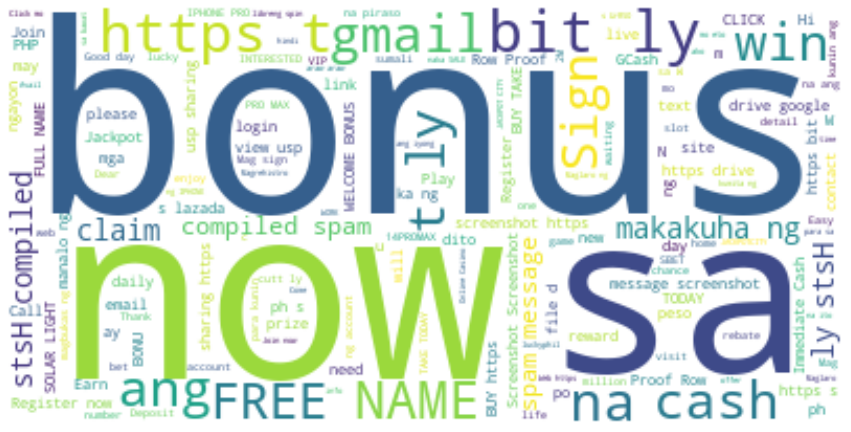

In [43]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Top Words**

In [44]:
#get top 25 words with count into a dataframe
raw_top25 = pd.DataFrame(FreqDist(text.split()).most_common(25), columns=['word','count'])

raw_top25

,word,count
0,ng,336
1,to,323
2,at,314
3,and,262
4,sa,242
5,na,229
6,ang,173
7,up,155
8,for,148
9,you,136


We can see that a lot of the punctuation were considered as a word and that there is a mix of stopwords in both the English and Tagalog language.

## **Natural Language Processing**

### **Text Cleaning**

#### **Stopwords Preparation**

In [45]:
#list of stopwords
en_stopwords = set(STOPWORDS)
en_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [46]:
#import txt as list
with open('Supplemental Datasets\genediazjr-tagalog.txt', 'r') as f:
    tl_stopwords = f.read().splitlines()

tl_stopwords

['ako',
 'sa',
 'akin',
 'ko',
 'aking',
 'sarili',
 'kami',
 'atin',
 'ang',
 'aming',
 'amin',
 'ating',
 'ka',
 'iyong',
 'iyo',
 'inyong',
 'siya',
 'kanya',
 'mismo',
 'ito',
 'nito',
 'kanyang',
 'sila',
 'nila',
 'kanila',
 'kanilang',
 'kung',
 'ano',
 'alin',
 'sino',
 'kanino',
 'na',
 'mga',
 'iyon',
 'am',
 'ay',
 'maging',
 'naging',
 'mayroon',
 'may',
 'nagkaroon',
 'pagkakaroon',
 'gumawa',
 'ginagawa',
 'ginawa',
 'paggawa',
 'ibig',
 'dapat',
 'maaari',
 'marapat',
 'kong',
 'ikaw',
 'tayo',
 'hindi',
 'namin',
 'gusto',
 'nais',
 'niyang',
 'nilang',
 'niya',
 'huwag',
 'ginawang',
 'gagawin',
 'maaaring',
 'sabihin',
 'narito',
 'kapag',
 'ni',
 'nasaan',
 'bakit',
 'paano',
 'kailangan',
 'walang',
 'katiyakan',
 'isang',
 'at',
 'pero',
 'o',
 'dahil',
 'bilang',
 'hanggang',
 'habang',
 'ng',
 'pamamagitan',
 'para',
 'tungkol',
 'laban',
 'pagitan',
 'panahon',
 'bago',
 'pagkatapos',
 'itaas',
 'ibaba',
 'mula',
 'pataas',
 'pababa',
 'palabas',
 'ibabaw',
 'il

In [47]:
#add 'mo' and 'lang' to tl_stopwords
tl_stopwords.extend(['mo', 'lang'])

In [48]:
#merging en_stopwords and tl_stopwords
stopwords = en_stopwords.union(tl_stopwords)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'akin',
 'aking',
 'ako',
 'alin',
 'all',
 'also',
 'am',
 'amin',
 'aming',
 'an',
 'and',
 'ang',
 'ano',
 'anumang',
 'any',
 'apat',
 'are',
 "aren't",
 'as',
 'at',
 'atin',
 'ating',
 'ay',
 'bababa',
 'bago',
 'bakit',
 'bawat',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bilang',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'dahil',
 'dalawa',
 'dapat',
 'did',
 "didn't",
 'din',
 'dito',
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'doon',
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'gagawin',
 'gayunman',
 'get',
 'ginagawa',
 'ginawa',
 'ginawang',
 'gumawa',
 'gusto',
 'habang',
 'had',
 "hadn't",
 'hanggang',
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'hindi',
 'his',
 'how',
 "how

#### **Removing Stopwords**

In [49]:
#remove stopwords from dataset
text_only = proof_filtered.copy()

text_only['proof'] = text_only['proof'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

text_only.head()

,proof,name,type
0,POEA,False,others
1,POEA,False,others
2,Federal Partylist,False,political
3,Build Build Build,False,political
4,luckyphil.com/login,False,lotto


In [50]:
#remove STOPWORDS from dataframe
text_only = text_only[text_only['proof'].notnull()].reset_index(drop=True)
text_only

,proof,name,type
0,POEA,False,others
1,POEA,False,others
2,Federal Partylist,False,political
3,Build Build Build,False,political
4,luckyphil.com/login,False,lotto
...,...,...,...
1409,"Araw-araw suweld0 5000, kai1angan 1-2 oras is@...",False,NaN
1410,Goodnews! VIP perks SUGARPLAY Sign & Claim PHP...,False,NaN
1411,Start referring & earning SUGARPLAY Earn everd...,True,NaN
1412,", Experience thrill JackpotCity! Enjoy 5% USDT...",True,NaN


#### **Removing Punctuation and Other Strings**

In [51]:
#remove punctuations from dataframe
text_only['proof'] = text_only['proof'].str.replace('[^\w\s]','')
text_only

C:\Users\Mos\AppData\Local\Temp\ipykernel_18748\2214577564.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  text_only['proof'] = text_only['proof'].str.replace('[^\w\s]','')


,proof,name,type
0,POEA,False,others
1,POEA,False,others
2,Federal Partylist,False,political
3,Build Build Build,False,political
4,luckyphilcomlogin,False,lotto
...,...,...,...
1409,Arawaraw suweld0 5000 kai1angan 12 oras isng a...,False,NaN
1410,Goodnews VIP perks SUGARPLAY Sign Claim PHP14...,False,NaN
1411,Start referring earning SUGARPLAY Earn everda...,True,NaN
1412,Experience thrill JackpotCity Enjoy 5 USDT De...,True,NaN


In [52]:
remove = ['httpstlystsH','https://t.ly/stsH','https','&', 'amp', 'amp;', 'tly', 't', 'ly', 'co', 'com', 'www', 'http']

#removing words from dataframe with `remove`
text_only['proof'] = text_only['proof'].apply(lambda x: ' '.join([word for word in x.split() if word not in (remove)]))

#removing single letters with regex
text_only['proof'] = text_only['proof'].str.replace(r'\b[a-zA-Z]\b', '')

C:\Users\Mos\AppData\Local\Temp\ipykernel_18748\2517495946.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  text_only['proof'] = text_only['proof'].str.replace(r'\b[a-zA-Z]\b', '')


### **Classification**

In the `spam.csv` dataset, the needed features such as the `proof` and the `name` are present. However, to add more to the analysis, we can do classification through machine learning with Natural Language Processing techniques.

### **Tokenizing**

In [53]:
text_only

,proof,name,type
0,POEA,False,others
1,POEA,False,others
2,Federal Partylist,False,political
3,Build Build Build,False,political
4,luckyphilcomlogin,False,lotto
...,...,...,...
1409,Arawaraw suweld0 5000 kai1angan 12 oras isng a...,False,NaN
1410,Goodnews VIP perks SUGARPLAY Sign Claim PHP148...,False,NaN
1411,Start referring earning SUGARPLAY Earn everday...,True,NaN
1412,Experience thrill JackpotCity Enjoy 5 USDT Dep...,True,NaN


In [54]:
text_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   proof   1414 non-null   object
 1   name    1414 non-null   bool  
 2   type    1228 non-null   object
dtypes: bool(1), object(2)
memory usage: 23.6+ KB


In [61]:
text_only.isnull().sum()

proof      0
name       0
type     186
token      0
dtype: int64

In [55]:
text_only['proof'] = text_only['proof'].astype(str).str.lower()

In [56]:
regexp = RegexpTokenizer('\w+')

text_only['token'] = text_only['proof'].apply(regexp.tokenize)


In [57]:
text_only

,proof,name,type,token
0,poea,False,others,[poea]
1,poea,False,others,[poea]
2,federal partylist,False,political,"[federal, partylist]"
3,build build build,False,political,"[build, build, build]"
4,luckyphilcomlogin,False,lotto,[luckyphilcomlogin]
...,...,...,...,...
1409,arawaraw suweld0 5000 kai1angan 12 oras isng a...,False,NaN,"[arawaraw, suweld0, 5000, kai1angan, 12, oras,..."
1410,goodnews vip perks sugarplay sign claim php148...,False,NaN,"[goodnews, vip, perks, sugarplay, sign, claim,..."
1411,start referring earning sugarplay earn everday...,True,NaN,"[start, referring, earning, sugarplay, earn, e..."
1412,experience thrill jackpotcity enjoy 5 usdt dep...,True,NaN,"[experience, thrill, jackpotcity, enjoy, 5, us..."


## **Exploratory Data Analysis (Cleaned Text)**

### **WordCloud**

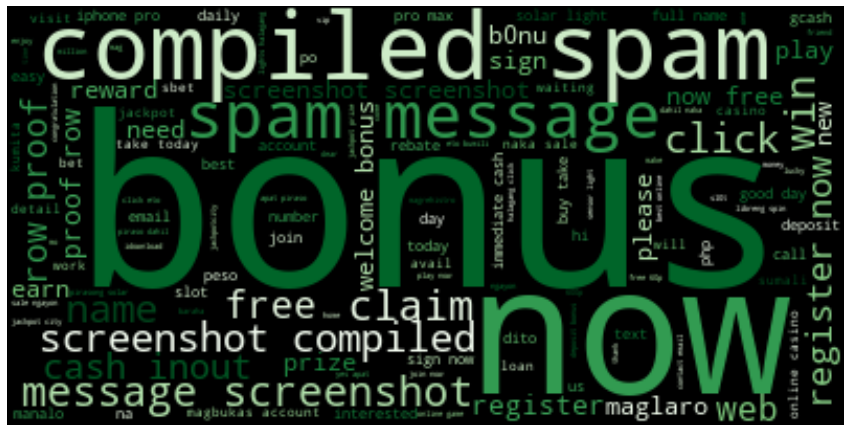

In [58]:
#wordcloud
text = " ".join(i for i in text_only.proof)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", colormap = "Greens").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Top Words**

In [59]:
#top 100 words with count from dataframe
top = pd.DataFrame(FreqDist(text_only['proof'].str.cat(sep=' ').split()).most_common(100), columns=['word','count'])
top

,word,count
0,bonus,211
1,now,206
2,cash,126
3,free,113
4,name,107
...,...,...
95,interested,26
96,vip,25
97,immediate,25
98,text,24


# **Saving**

In [60]:
#top.to_csv('Processed Datasets/top100_words.csv', index=False)
#text_only.to_csv('Processed Datasets/proof_cleaned.csv', index=False)

#saving wordcloud as png
#wordcloud.to_file('wordcloud.png')